# 06 - a - Jupiter - Feasibility Charts - Drag

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Set up the planet and atmosphere model.
planet=Planet("JUPITER")
planet.h_skip = 1000e3
planet.h_low = 50e3
planet.loadAtmosphereModel('../atmdata/Jupiter/jupiter-galileo-asi.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [3]:
beta1 = 20.0

runID = 'jupiter-drag-'

In [6]:
vinf_kms_array  = np.linspace( 0.0,   30.0,   11)
betaRatio_array = np.linspace( 1.0,   41.0 ,  11)

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [7]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 300.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(2400.0, 1.0, -15.0,-4.0,1E-10,4000.0)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (2400.0, 1.0, -15.0,-4.0,1E-10,4000.0)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 0.2136042777055991 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 0.2881665681998129 deg.
VINF: 0.0 km/s, BETA RATIO: 13.0 TCW: 0.3363312108849641 deg.
VINF: 0.0 km/s, BETA RATIO: 17.0 TCW: 0.3727796818857314 deg.
VINF: 0.0 km/s, BETA RATIO: 21.0 TCW: 0.4020524562583887 deg.
VINF: 0.0 km/s, BETA RATIO: 25.0 TCW: 0.42639978193619754 deg.
VINF: 0.0 km/s, BETA RATIO: 29.0 TCW: 0.4470359181796084 deg.
VINF: 0.0 km/s, BETA RATIO: 33.0 TCW: 0.4646622138097882 deg.
VINF: 0.0 km/s, BETA RATIO: 37.0 TCW: 0.4799478743370855 deg.
VINF: 0.0 km/s, BETA RATIO: 41.0 TCW: 0.4931755976722343 deg.
VINF: 3.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 3.0 km/s, BETA RATIO: 5.0 TCW: 0.21373630032030633 deg.
VINF: 3.0 km/s, BETA RATIO: 9.0 TCW: 0.2883251091479906 deg.
VINF: 3.0 km/s, BETA RATIO: 13.0 TCW: 0.3364456538547529 deg.
VINF: 3.0 km/s, BETA RATIO: 17.0 TCW: 0.37299971061293036 deg.
VINF: 3.0 km/s, BETA RATIO: 21.0 TCW: 0.4

In [34]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 300, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)

        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 300.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-5)

        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 28.123401441184843 QDOT_MAX: 6620.818090179809 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 28.123401441184843 QDOT_MAX: 9171.31992635625 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 9.0 G_MAX: 28.123401441184843 QDOT_MAX: 9895.565111584066 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 13.0 G_MAX: 28.123401441184843 QDOT_MAX: 10321.759363668096 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 17.0 G_MAX: 28.123401441184843 QDOT_MAX: 10628.786756903619 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 21.0 G_MAX: 28.123401441184843 QDOT_MAX: 10872.998698541747 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 25.0 G_MAX: 28.123401441184843 QDOT_MAX: 11065.380917028317 J_MAX: 593560.6703787534 STAG. PRES: 0.05446142114560911
V_infty: 0.0 km/s, BR: 29.0

V_infty: 15.0 km/s, BR: 21.0 G_MAX: 31.732463655778965 QDOT_MAX: 12511.577086800833 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 15.0 km/s, BR: 25.0 G_MAX: 31.732463655778965 QDOT_MAX: 12745.313842175558 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 15.0 km/s, BR: 29.0 G_MAX: 31.732463655778965 QDOT_MAX: 12937.734673104183 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 15.0 km/s, BR: 33.0 G_MAX: 31.732463655778965 QDOT_MAX: 13091.5909681296 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 15.0 km/s, BR: 37.0 G_MAX: 31.732463655778965 QDOT_MAX: 13237.086059552761 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 15.0 km/s, BR: 41.0 G_MAX: 31.732463655778965 QDOT_MAX: 13351.999875333666 J_MAX: 640555.5001101592 STAG. PRES: 0.06144948794916808
V_infty: 18.0 km/s, BR: 1.0 G_MAX: 33.342814221473915 QDOT_MAX: 7969.121670998365 J_MAX: 661547.9906496889 STAG. PRES: 0.0645673203749776
V_infty: 18.0 km/s

V_infty: 30.0 km/s, BR: 37.0 G_MAX: 42.85957081318483 QDOT_MAX: 20380.3404375406 J_MAX: 790386.6944246079 STAG. PRES: 0.08299270637133607
V_infty: 30.0 km/s, BR: 41.0 G_MAX: 42.85957081318483 QDOT_MAX: 20588.780002122272 J_MAX: 790386.6944246079 STAG. PRES: 0.08299270637133607


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


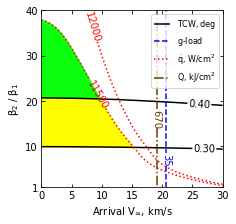

In [50]:
x = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  110)
y_new =  np.linspace( 0.0,   41 ,110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.3,0.4])

Glevels = np.array([35])
Qlevels = np.array([11500.0, 12000.0])
Hlevels = np.array([670])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([3.25,3.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.xlim([0.0,30.0])
plt.ylim([1.0,41.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
plt.ylim(1,40)
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=10)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=10)
plt.xticks( fontsize=10)
plt.yticks(np.array([ 1, 10, 20, 30, 40,]),fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=8)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

dat0 = ZCS1.allsegs[1][0]

x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)


dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,301)
y4 = F1(x4)
y4a =F1a(x4)


y6 = F3(x4)

y7 = y6
y8 = np.minimum(y4,y6)



plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')







plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


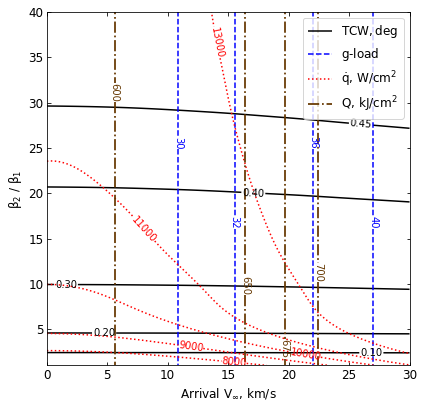

In [53]:
x = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')

x_new =  np.linspace( 0.0,   30,  210)
y_new =  np.linspace( 1.0,   41 , 110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])

Z1 = z1_new
G1 = g1_new
Q1 = q1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.1, 0.2, 0.3, 0.4, 0.45])

Glevels = np.array([30, 32, 36, 40])
Qlevels = np.array([8000.0, 9000.0, 10000.0, 11000.0, 13000.0 ])
Hlevels = np.array([600, 650, 675, 700])
#Slevels = np.array([0.8])

fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)


ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')


for l in Glabels:
    l.set_rotation(-90)



QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)



QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)


HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

for l in Hlabels:
    l.set_rotation(-90)

plt.ylim(1,40)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)


plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-drag-large.eps', dpi=300,bbox_inches='tight')

 
plt.show()